In [1]:
import sys
import json
from pathlib import Path
import matplotlib.pyplot as plt
# Adding the parent and project folders to the path
notebook_dir = Path.cwd()
src_folder = str(notebook_dir.parents[0])
project_folder = str(notebook_dir.parents[1])
sys.path += [src_folder, project_folder]

from evaluation.benchmark import *


/Users/alanpiovesana/Desktop/masters/qel/venv_qel/lib/python3.10/site-packages/cotengra/hyperoptimizers/hyper.py:33: UserWarning: Couldn't import `kahypar` - skipping from default hyper optimizer and using basic `labels` method instead.
  warnings.warn(


In [2]:
files = find_specific_files(project_folder + '/Data/MRI Dataset', ".gz")
results_dict = {"files": files}

In [3]:
files

['/Users/alanpiovesana/Desktop/masters/qel/img-compression-mps/Data/MRI Dataset/sub-03_T1w.nii.gz',
 '/Users/alanpiovesana/Desktop/masters/qel/img-compression-mps/Data/MRI Dataset/sub-12_T1w.nii.gz',
 '/Users/alanpiovesana/Desktop/masters/qel/img-compression-mps/Data/MRI Dataset/sub-06_T1w.nii.gz',
 '/Users/alanpiovesana/Desktop/masters/qel/img-compression-mps/Data/MRI Dataset/sub-01_T1w.nii.gz',
 '/Users/alanpiovesana/Desktop/masters/qel/img-compression-mps/Data/MRI Dataset/sub-10_T1w.nii.gz',
 '/Users/alanpiovesana/Desktop/masters/qel/img-compression-mps/Data/MRI Dataset/sub-09_T1w.nii.gz',
 '/Users/alanpiovesana/Desktop/masters/qel/img-compression-mps/Data/MRI Dataset/sub-04_T1w.nii.gz',
 '/Users/alanpiovesana/Desktop/masters/qel/img-compression-mps/Data/MRI Dataset/sub-07_T1w.nii.gz',
 '/Users/alanpiovesana/Desktop/masters/qel/img-compression-mps/Data/MRI Dataset/sub-02_T1w.nii.gz',
 '/Users/alanpiovesana/Desktop/masters/qel/img-compression-mps/Data/MRI Dataset/sub-13_T1w.nii.gz',


In [4]:
data_list = load_tensors(files)

Loading file 1/13
Loading file 2/13
Loading file 3/13
Loading file 4/13
Loading file 5/13
Loading file 6/13
Loading file 7/13
Loading file 8/13
Loading file 9/13
Loading file 10/13
Loading file 11/13
Loading file 12/13
Loading file 13/13


In [5]:
mps_list_dct_no_patching = conv_to_mps(data_list, dct_level=None)


Converting file 1/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]


/Users/alanpiovesana/Desktop/masters/qel/img-compression-mps/src/compression/utils_ND.py:110: RuntimeWarning: invalid value encountered in cast
  prod_block_sizes[0] = prod_block_sizes[0] * 1e100 # TODO maybe find another way for this


Converting file 2/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 3/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 4/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 5/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 6/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 7/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 8/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 9/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 10/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 11/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 12/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 13/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]


In [6]:
mps_list_dct_coarsest_patching = conv_to_mps(data_list, dct_level=-1)

Converting file 1/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 2/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 3/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 4/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 5/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 6/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 7/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 8/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 9/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 10/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 11/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 12/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 13/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]


In [7]:
cutoff_list = np.linspace(0, 0.2, 20)[1:]
results_dict["cutoff_list"] = cutoff_list.tolist()

## Test: can we speedup the benchmark?
- Obs: with hierarchical encoding scheme

In [8]:
ssim_list_no_patching, compression_ratio_list_no_patching, bond_dim_list_no_patching = run_benchmark(mps_list_dct_no_patching, data_list, cutoff_list)

# XX for 19 cutoff values

Running compression step 1/19
Running compression step 2/19
Running compression step 3/19
Running compression step 4/19
Running compression step 5/19
Running compression step 6/19
Running compression step 7/19
Running compression step 8/19
Running compression step 9/19
Running compression step 10/19
Running compression step 11/19
Running compression step 12/19
Running compression step 13/19
Running compression step 14/19
Running compression step 15/19
Running compression step 16/19
Running compression step 17/19
Running compression step 18/19
Running compression step 19/19


In [9]:
print(cutoff_list)

print(ssim_list_no_patching)

[0.01052632 0.02105263 0.03157895 0.04210526 0.05263158 0.06315789
 0.07368421 0.08421053 0.09473684 0.10526316 0.11578947 0.12631579
 0.13684211 0.14736842 0.15789474 0.16842105 0.17894737 0.18947368
 0.2       ]
[[1.         0.99807597 0.99649441 0.99119959 0.98162956 0.96615807
  0.94306727 0.91646342 0.88579037 0.83967538 0.7998926  0.76803861
  0.71721243 0.66936359 0.62982351 0.59104965 0.55431472 0.5315719
  0.51417381 0.49371205]
 [1.         0.99821309 0.99766003 0.99416489 0.98476554 0.97198453
  0.95487875 0.93599469 0.91334062 0.882231   0.83821247 0.80191305
  0.75567091 0.71844399 0.69191546 0.64392153 0.62295361 0.61877117
  0.61567618 0.61301188]
 [1.         0.99811387 0.99691261 0.99166063 0.98028901 0.95958042
  0.93352141 0.90531776 0.87197458 0.82672661 0.78931892 0.7513016
  0.68092731 0.63800195 0.59871101 0.58041596 0.53955601 0.50493928
  0.48604056 0.46948039]
 [1.         0.99909793 0.99790432 0.99368062 0.98499009 0.96703055
  0.94445134 0.91736227 0.8873452

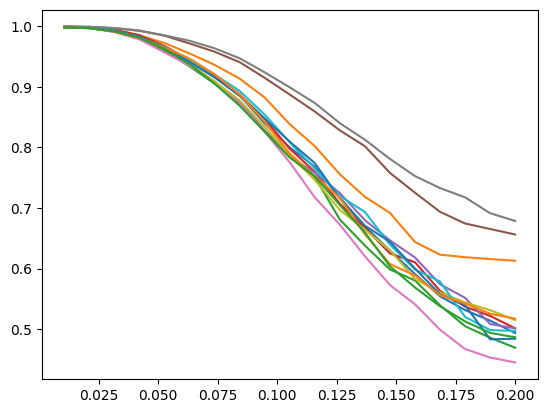

In [10]:
plt.figure()
for i in range(0, len(ssim_list_no_patching)):
    plt.plot(cutoff_list, ssim_list_no_patching[i][1:])

plt.show()

In [11]:
ssim_list_with_patching, compression_ratio_list_with_patching, bond_dim_list_with_patching = run_benchmark(
    mps_list_dct_coarsest_patching, data_list, cutoff_list
)

Running compression step 1/19
Running compression step 2/19
Running compression step 3/19
Running compression step 4/19
Running compression step 5/19
Running compression step 6/19
Running compression step 7/19
Running compression step 8/19
Running compression step 9/19
Running compression step 10/19
Running compression step 11/19
Running compression step 12/19
Running compression step 13/19
Running compression step 14/19
Running compression step 15/19
Running compression step 16/19
Running compression step 17/19
Running compression step 18/19
Running compression step 19/19


In [12]:
print(ssim_list_with_patching)

[[1.         1.         1.         0.99890715 0.99299989 0.9847864
  0.97340508 0.95364256 0.93198544 0.89875425 0.87210524 0.84276072
  0.80853171 0.77343595 0.75021794 0.72093898 0.67473991 0.62600086
  0.58888518 0.56020415]
 [1.         1.         1.         0.99920294 0.99452515 0.98813869
  0.97929463 0.96258961 0.94111388 0.92064024 0.90401059 0.8805762
  0.8517863  0.82910281 0.80030174 0.75013645 0.69680782 0.65736828
  0.6319808  0.61007186]
 [1.         1.         1.         0.99850175 0.99168527 0.98228042
  0.96858772 0.94472799 0.91849149 0.88420128 0.86072973 0.83001998
  0.79290315 0.76495511 0.73927276 0.70849123 0.65324639 0.5860268
  0.53981687 0.51218711]
 [1.         1.         1.         0.99861612 0.99325796 0.9853768
  0.97359695 0.95277967 0.92824052 0.89660009 0.87303226 0.84624589
  0.81627346 0.79357357 0.76899991 0.73475619 0.68214338 0.62032337
  0.57097885 0.54376564]
 [1.         1.         1.         0.99845827 0.9904997  0.98058483
  0.96793008 0.95055

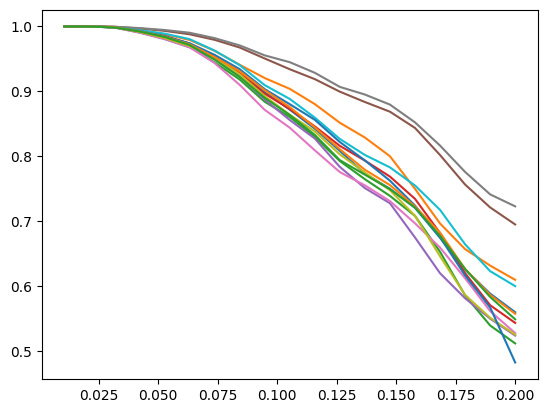

In [13]:
plt.figure()
for i in range(0, len(ssim_list_with_patching)):
    plt.plot(cutoff_list, ssim_list_with_patching[i][1:])

plt.show()

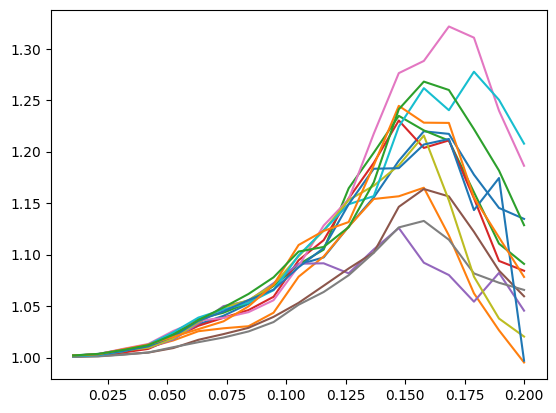

In [14]:
# Ratio between the two levels of DCT

plt.figure()
for i in range(0, len(ssim_list_with_patching)):
    plt.plot(cutoff_list, ssim_list_with_patching[i][1:]/ssim_list_no_patching[i][1:])

plt.show()

## Testing different levels to apply the dct

In [15]:
mps_list_dct = []
for level in [0, 1, 2, 3, 4, 5]:
    mps_list_dct.append(conv_to_mps(data_list, dct_level=level))

Converting file 1/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 2/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 3/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 4/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 5/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 6/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 7/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 8/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 9/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 10/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 11/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 12/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 13/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 1/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 2/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 3/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting file 4/13
Valid DCT levels: [0, 1, 2, 3, 4, 5]
Converting

In [16]:
ssim_list = []
compression_ratio_list = []
bond_dim_list = []

for i in [0, 1, 2, 3, 4, 5]:
    ssim, compression_ratio, bond_dim = run_benchmark(
        mps_list_dct[i], data_list, cutoff_list
    )
    ssim_list.append(ssim)
    compression_ratio_list.append(compression_ratio)
    bond_dim_list.append(bond_dim)


Running compression step 1/19
Running compression step 2/19
Running compression step 3/19
Running compression step 4/19
Running compression step 5/19
Running compression step 6/19
Running compression step 7/19
Running compression step 8/19
Running compression step 9/19
Running compression step 10/19
Running compression step 11/19
Running compression step 12/19
Running compression step 13/19
Running compression step 14/19
Running compression step 15/19
Running compression step 16/19
Running compression step 17/19
Running compression step 18/19
Running compression step 19/19
Running compression step 1/19
Running compression step 2/19
Running compression step 3/19
Running compression step 4/19
Running compression step 5/19
Running compression step 6/19
Running compression step 7/19
Running compression step 8/19
Running compression step 9/19
Running compression step 10/19
Running compression step 11/19
Running compression step 12/19
Running compression step 13/19
Running compression step 1

In [17]:
ssim_list_no_patching, compression_ratio_list_no_patching, bond_dim_list_no_patching = run_benchmark(mps_list_dct_no_patching, data_list, cutoff_list)

Running compression step 1/19
Running compression step 2/19
Running compression step 3/19
Running compression step 4/19
Running compression step 5/19
Running compression step 6/19
Running compression step 7/19
Running compression step 8/19
Running compression step 9/19
Running compression step 10/19
Running compression step 11/19
Running compression step 12/19
Running compression step 13/19
Running compression step 14/19
Running compression step 15/19
Running compression step 16/19
Running compression step 17/19
Running compression step 18/19
Running compression step 19/19


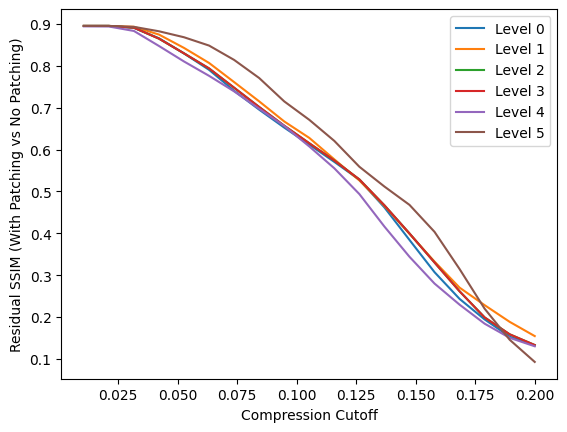

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# Convert ssim_list to a numpy array for safe indexing
ssim_list = np.array(ssim_list)  # Shape: (5, 13, 20)
ssim_list_no_patching = np.array(ssim_list_no_patching)  # Shape: (13, 20)

# Compute mean over second dimension (axis=1), keeping levels and cutoff
avg_ssim_with_patching = np.mean(ssim_list, axis=1)  # Shape: (5, 20)
avg_ssim_no_patching = np.mean(ssim_list_no_patching, axis=0)  # Shape: (20,)

# Compute the SSIM ratio
ssim_list_avg = avg_ssim_with_patching / avg_ssim_no_patching - 1  # Shape: (5, 20)

# Plot each hierarchical level separately
plt.figure()
for level in range(ssim_list_avg.shape[0]):
    plt.plot(cutoff_list, ssim_list_avg[level, 1:], label=f"Level {level}")

plt.xlabel("Compression Cutoff")
plt.ylabel("Residual SSIM (With Patching vs No Patching)")
plt.legend()
plt.show()

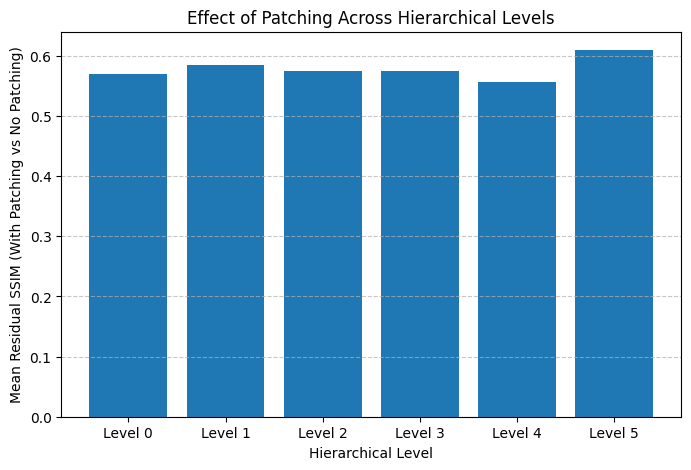

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Convert lists to numpy arrays for consistent indexing
ssim_list = np.array(ssim_list)  # Shape: (num_levels, num_curves, num_cutoffs)
ssim_list_no_patching = np.array(ssim_list_no_patching)  # Shape: (num_curves, num_cutoffs)

# Compute mean over the second dimension (axis=1), keeping levels and cutoffs
avg_ssim_with_patching = np.mean(ssim_list, axis=1)  # Shape: (num_levels, num_cutoffs)
avg_ssim_no_patching = np.mean(ssim_list_no_patching, axis=0)  # Shape: (num_cutoffs,)

# Compute the SSIM ratio (relative improvement)
ssim_list_avg = avg_ssim_with_patching / avg_ssim_no_patching - 1  # Shape: (num_levels, num_cutoffs)

# Compute **mean SSIM improvement over all compression ratios** (axis=1)
mean_ssim_improvement = np.mean(ssim_list_avg[:, 1:], axis=1)  # Shape: (num_levels,)

# Plot a **bar chart** of SSIM improvement by hierarchical level
plt.figure(figsize=(8, 5))
plt.bar(range(len(mean_ssim_improvement)), mean_ssim_improvement, tick_label=[f"Level {i}" for i in range(len(mean_ssim_improvement))])

plt.xlabel("Hierarchical Level")
plt.ylabel("Mean Residual SSIM (With Patching vs No Patching)")
plt.title("Effect of Patching Across Hierarchical Levels")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

# Test: what changes if we do row-major vs snake vs hierarchical encoding?

In [16]:
print(len(data_list[:10]))

10


In [8]:
import matplotlib.pyplot as plt

data_list_reduced = data_list[:10]

In [9]:
# Row-major encoding
mps_list_row = conv_to_mps(data_list, encoding_scheme="rowmajor")
ssim_list_row, compression_ratio_list_row, bond_dim_list_row = run_benchmark(mps_list_row, data_list, cutoff_list)

Converting file 1/13


ValueError: maximum supported dimension for an ndarray is currently 64, found 5898240

In [ ]:
for i in np.arange(ssim_list_row.shape[0]):
    plt.plot(1/compression_ratio_list_row[i,:20], ssim_list_row[i,:20], label=f"File {i+1}")

plt.title("SSIM vs Compression Ratio for Row-Major Encoding")
plt.xlabel("Compression Ratio")
plt.ylabel("SSIM")

In [ ]:
# Snake encoding
mps_list_snake = conv_to_mps(data_list, encoding_scheme="snake")
ssim_list_snake, compression_ratio_list_snake, bond_dim_list_snake = run_benchmark(mps_list_snake, data_list, cutoff_list)

In [ ]:
for i in np.arange(ssim_list_snake.shape[0]):
    plt.plot(1/compression_ratio_list_snake[i,:20], ssim_list_snake[i,:20], label=f"File {i+1}")

plt.title("SSIM vs Compression Ratio for Snake Encoding")
plt.xlabel("Compression Ratio")
plt.ylabel("SSIM")

In [ ]:
# Hierarchical encoding
mps_list_hierarchical = conv_to_mps(data_list, encoding_scheme="hierarchical")
ssim_list_hierarchical, compression_ratio_list_hierarchical, bond_dim_list_hierarchical = run_benchmark(mps_list_hierarchical, data_list, cutoff_list)

In [ ]:
for i in np.arange(ssim_list_hierarchical.shape[0]):
    plt.plot(1/compression_ratio_list_hierarchical[i,:20], ssim_list_hierarchical[i,:20], label=f"File {i+1}")

plt.title("SSIM vs Compression Ratio for Hierarchical Encoding")
plt.xlabel("Compression Ratio")
plt.ylabel("SSIM")

## =========================================

In [ ]:
results_dict["ssim_list"] = ssim_list.tolist()
results_dict["compression_ratio_list"] = compression_ratio_list.tolist()

In [ ]:
results_dict

{'files': ['/Users/maxge/Documents/Studium/München/02_SS 2024/QEL/Block encoding generalization/img-compression-mps/Data/MRI Dataset/sub-03_T1w.nii.gz',
  '/Users/maxge/Documents/Studium/München/02_SS 2024/QEL/Block encoding generalization/img-compression-mps/Data/MRI Dataset/sub-12_T1w.nii.gz',
  '/Users/maxge/Documents/Studium/München/02_SS 2024/QEL/Block encoding generalization/img-compression-mps/Data/MRI Dataset/sub-06_T1w.nii.gz',
  '/Users/maxge/Documents/Studium/München/02_SS 2024/QEL/Block encoding generalization/img-compression-mps/Data/MRI Dataset/sub-01_T1w.nii.gz',
  '/Users/maxge/Documents/Studium/München/02_SS 2024/QEL/Block encoding generalization/img-compression-mps/Data/MRI Dataset/sub-10_T1w.nii.gz',
  '/Users/maxge/Documents/Studium/München/02_SS 2024/QEL/Block encoding generalization/img-compression-mps/Data/MRI Dataset/sub-09_T1w.nii.gz',
  '/Users/maxge/Documents/Studium/München/02_SS 2024/QEL/Block encoding generalization/img-compression-mps/Data/MRI Dataset/sub

In [ ]:
with open(src_folder + '/evaluation/results/results_dict1.json', 'w') as fp:
    json.dump(results_dict, fp)

In [ ]:
np.shape(compression_ratio_list)

(13, 3)

In [ ]:
np.array(ssim_list)[:,3]

array([0.99816133, 0.76922524, 0.52221449])

In [ ]:
np.array(compression_ratio_list)[:,3]

array([1.44562717, 1.17826742, 0.1727105 ])

In [ ]:
ssim_list.shape[0]

13

In [ ]:
np.arange(ssim_list.shape[0])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [ ]:
save_object(ssim_list, "ssim_list.pkl")
save_object(compression_ratio_list, "compression_ratio_list.pkl")

Text(0, 0.5, 'SSIM')

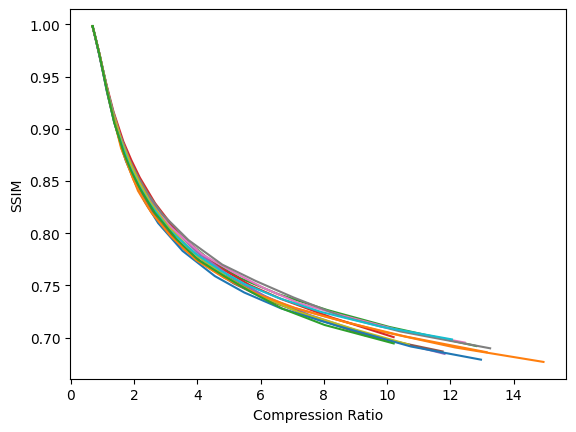

In [ ]:
for i in np.arange(ssim_list.shape[0]):
    plt.plot(1/compression_ratio_list[i,:20], ssim_list[i,:20], label=f"File {i+1}")

plt.xlabel("Compression Ratio")
plt.ylabel("SSIM")

In [ ]:
cutoff_list[:40]

array([0.00481928, 0.00963855, 0.01445783, 0.01927711, 0.02409639,
       0.02891566, 0.03373494, 0.03855422, 0.04337349, 0.04819277,
       0.05301205, 0.05783133, 0.0626506 , 0.06746988, 0.07228916,
       0.07710843, 0.08192771, 0.08674699, 0.09156627, 0.09638554,
       0.10120482, 0.1060241 , 0.11084337, 0.11566265, 0.12048193,
       0.1253012 , 0.13012048, 0.13493976, 0.13975904, 0.14457831,
       0.14939759, 0.15421687, 0.15903614, 0.16385542, 0.1686747 ,
       0.17349398, 0.17831325, 0.18313253, 0.18795181, 0.19277108])

In [ ]:
for mps in mps_list:
    print(mps.compression_ratio())

1.445627170138889
1.445627170138889
1.445627170138889
1.445627170138889
1.445627170138889
1.445627170138889
1.445627170138889
1.445627170138889
1.445627170138889
1.445627170138889
1.445627170138889
1.445627170138889
1.445627170138889


In [ ]:
mps_list[3].mps.bond_size(1,2)

1

In [ ]:
recovered_img_0 = mps_list[0].mps_to_matrix()
recovered_img_1 = mps_list[1].mps_to_matrix()

In [ ]:
def data_loader(data_path):
    data = nib.load(data_path).get_fdata()
    return data

In [ ]:
mri_file = './MRI Dataset/sub-01_T1w.nii.gz'
img = nib.load(mri_file)

In [ ]:
img_data = img.get_fdata()
print(type(img_data))  # it's a numpy array!
print(img_data.shape)

<class 'numpy.ndarray'>
(160, 192, 192)


(192, 192)


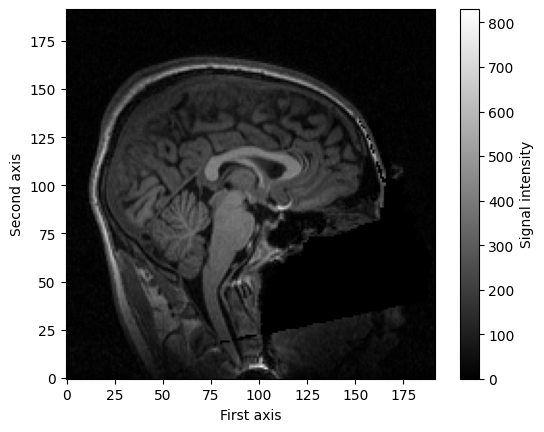

In [ ]:
mid_slice_x = img_data[80, :, :]
print(mid_slice_x.shape)
# Note that the transpose the slice (using the .T attribute).
# This is because imshow plots the first dimension on the y-axis and the
# second on the x-axis, but we'd like to plot the first on the x-axis and the
# second on the y-axis. Also, the origin to "lower", as the data was saved in
# "cartesian" coordinates.
plt.imshow(mid_slice_x.T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

In [ ]:
mps = NDMPS.from_tensor(img_data, norm = False, mode="DCT") # TODO: check if this works

In [ ]:
# mps = NDMPS.from_matrix(img_data, norm = False, mode="DCT")

Time to run balance_factors: 0.0000 seconds
Time to run balance_factors: 0.0000 seconds


In [ ]:
mps.compression_ratio()

np.float64(1.445627170138889)

In [ ]:
mps.continuous_compress(0.08)

Compression ratio at 0.0008: 1.445627170138889
Compression ratio at 0.004: 1.445627170138889
Compression ratio at 0.008: 1.445627170138889
Compression ratio at 0.016: 1.3900282118055556
Compression ratio at 0.04: 0.5589009602864583
Compression ratio at 0.064: 0.24091118706597223
Compression ratio at 0.08: 0.12302042643229166


In [ ]:
mps.compression_ratio()

np.float64(0.12302042643229166)

In [ ]:
recovered_img = mps.mps_to_matrix()

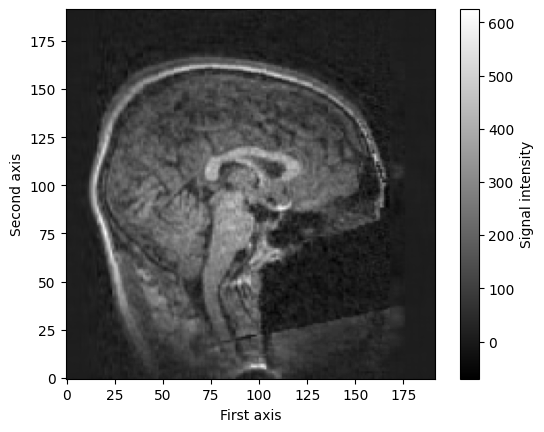

In [ ]:
plt.imshow(recovered_img[80,:,:].T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

In [ ]:
from utils import rescale_image

In [ ]:
a = np.array([-5,4])
b = np.array([0,4])
min = np.min(b)
max = np.max(b)
def rescale_data(data, min, max):
    data_min = np.min(data)
    data_max = np.max(data)
    data = min + (max - min) / (data_max - data_min) * (data - data_min)
    return data

In [ ]:
rescale_data(a, min, max)

array([0., 4.])